[Exploratory_Data_Analysis](#Exploratory_Data_Analysis)

 * [1 Analyzing Data's Stats](#1_Analyzing_Datas_Stats)
   * [1a. Data Tables](#1a.Data_Tables)
   
   
 * [2 Data Relationships](#2_Data_Relationships)
   * [2.1_Heatmap](#2.1_Heatmap)
   * [2.2_Pair_Plot](#2.2_Pair_Plot)
   
 * [3 Feature Selection And Engineering](#3_Feature_Selection_And_Engineering)


# Exploratory Data Analysis <a id='Exploratory_Data_Analysis'></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats

In [10]:
df = pd.read_csv('datasets/Clean_Pandemic_Taxi_Data.csv', index_col=0)
df.head()

,avg_VendorID_hour,avg_passenger_count_hour,avg_trip_distance_hour,avg_RatecodeID_hour,avg_fare_amount_hour,avg_extra_hour,avg_mta_tax_hour,avg_tip_amount_hour,avg_tolls_amount_hour,avg_improvement_surcharge_hour,...,avg_Queens_PU_isna_hour,avg_Bronx_PU_isna_hour,avg_Brooklyn_PU_isna_hour,avg_Staten_Island_PU_isna_hour,avg_Manhattan_DO_isna_hour,avg_Queens_DO_isna_hour,avg_Bronx_DO_isna_hour,avg_Brooklyn_DO_isna_hour,avg_Staten_Island_DO_isna_hour,avg_Mins_In_Ride_hour
2020-01-01 00:00:00,1.693601,1.687510,2.408714,0.998782,11.389942,1.219202,0.5,1.887437,0.000910,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.420050
2020-01-01 01:00:00,1.697895,1.683354,2.564234,0.998770,11.581830,1.182341,0.5,1.958635,0.000405,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.356097
2020-01-01 02:00:00,1.688215,1.647092,2.690488,0.998540,11.325833,1.195151,0.5,1.940590,0.001363,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.094755
2020-01-01 03:00:00,1.698586,1.630557,2.791689,0.999326,11.313673,1.182027,0.5,1.848462,0.001200,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.545077
2020-01-01 04:00:00,1.712146,1.637443,2.921626,0.999817,11.491224,1.137763,0.5,1.657045,0.001534,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.273529


# 1. Analyzing Data's Stats <a id='1_Analyzing_Datas_Stats'></a>

# 1a. Data Tables <a id='1a.Data_Tables'></a>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4368 entries, 2020-01-01 00:00:00 to 2020-06-30 23:00:00
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   avg_VendorID_hour               4367 non-null   float64
 1   avg_passenger_count_hour        4367 non-null   float64
 2   avg_trip_distance_hour          4367 non-null   float64
 3   avg_RatecodeID_hour             4367 non-null   float64
 4   avg_fare_amount_hour            4367 non-null   float64
 5   avg_extra_hour                  4367 non-null   float64
 6   avg_mta_tax_hour                4367 non-null   float64
 7   avg_tip_amount_hour             4367 non-null   float64
 8   avg_tolls_amount_hour           4367 non-null   float64
 9   avg_improvement_surcharge_hour  4367 non-null   float64
 10  avg_total_amount_hour           4367 non-null   float64
 11  avg_congestion_surcharge_hour   4367 non-null   float64
 12  avg_Br

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_VendorID_hour,4367.0,1.521425,2.077882e-01,0.281250,1.484356,1.572704,1.659490,1.809524
avg_passenger_count_hour,4367.0,1.308074,2.310822e-01,0.218750,1.217668,1.336683,1.469897,2.000000
avg_trip_distance_hour,4367.0,2.586941,8.149919e-01,1.677661,2.104912,2.380163,2.817782,8.210676
avg_RatecodeID_hour,4367.0,0.934164,1.156146e-01,0.187500,0.938665,0.973759,0.995850,1.000720
avg_fare_amount_hour,4367.0,10.666862,2.091754e+00,8.020914,9.621688,10.105864,10.848695,26.951875
avg_extra_hour,4367.0,1.072678,3.382215e-01,0.094595,0.825652,0.950000,1.245399,2.248453
avg_mta_tax_hour,4367.0,0.500000,0.000000e+00,0.500000,0.500000,0.500000,0.500000,0.500000
avg_tip_amount_hour,4367.0,1.459129,3.798792e-01,0.068235,1.270736,1.510107,1.725456,2.222693
avg_tolls_amount_hour,4367.0,0.001824,6.604569e-03,0.000000,0.000000,0.000000,0.000940,0.140000
avg_improvement_surcharge_hour,4367.0,0.300000,3.614072e-14,0.300000,0.300000,0.300000,0.300000,0.300000


<Figure size 1080x360 with 0 Axes>

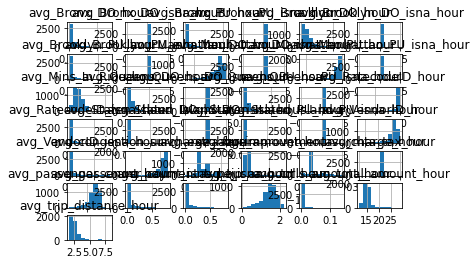

In [13]:
plt.figure(figsize=(15, 5))
df.hist()
plt.show()

In [14]:
num_cols = df.describe().columns
num_cols

Index(['avg_VendorID_hour', 'avg_passenger_count_hour',
       'avg_trip_distance_hour', 'avg_RatecodeID_hour', 'avg_fare_amount_hour',
       'avg_extra_hour', 'avg_mta_tax_hour', 'avg_tip_amount_hour',
       'avg_tolls_amount_hour', 'avg_improvement_surcharge_hour',
       'avg_total_amount_hour', 'avg_congestion_surcharge_hour',
       'avg_Bronx_PU_hour', 'avg_Brooklyn_PU_hour', 'avg_Manhattan_PU_hour',
       'avg_Queens_PU_hour', 'avg_Staten_Island_PU_hour', 'avg_Bronx_DO_hour',
       'avg_Brooklyn_DO_hour', 'avg_Manhattan_DO_hour', 'avg_Queens_DO_hour',
       'avg_Staten_Island_DO_hour', 'avg_VendorID_isna_hour',
       'avg_passenger_count_isna_hour', 'avg_RatecodeID_isna_hour',
       'avg_payment_type_isna_hour', 'avg_Manhattan_PU_isna_hour',
       'avg_Queens_PU_isna_hour', 'avg_Bronx_PU_isna_hour',
       'avg_Brooklyn_PU_isna_hour', 'avg_Staten_Island_PU_isna_hour',
       'avg_Manhattan_DO_isna_hour', 'avg_Queens_DO_isna_hour',
       'avg_Bronx_DO_isna_hour', 'avg_Br

# 2. Data Relationships <a id='2_Data_Relationships'></a>

# 2.1 Heatmap<a id='2.1_Heatmap'></a>

Need to create an AutoCorrelation

In [15]:
temp = df[df.columns[:22]].join(df['avg_Mins_In_Ride_hour'])
temp.head()

,avg_VendorID_hour,avg_passenger_count_hour,avg_trip_distance_hour,avg_RatecodeID_hour,avg_fare_amount_hour,avg_extra_hour,avg_mta_tax_hour,avg_tip_amount_hour,avg_tolls_amount_hour,avg_improvement_surcharge_hour,...,avg_Brooklyn_PU_hour,avg_Manhattan_PU_hour,avg_Queens_PU_hour,avg_Staten_Island_PU_hour,avg_Bronx_DO_hour,avg_Brooklyn_DO_hour,avg_Manhattan_DO_hour,avg_Queens_DO_hour,avg_Staten_Island_DO_hour,avg_Mins_In_Ride_hour
2020-01-01 00:00:00,1.693601,1.687510,2.408714,0.998782,11.389942,1.219202,0.5,1.887437,0.000910,0.3,...,0.017785,0.963781,0.016242,0.0,0.009177,0.041660,0.917411,0.031752,0.0,13.420050
2020-01-01 01:00:00,1.697895,1.683354,2.564234,0.998770,11.581830,1.182341,0.5,1.958635,0.000405,0.3,...,0.043406,0.935325,0.018230,0.0,0.010851,0.064964,0.881357,0.042827,0.0,13.356097
2020-01-01 02:00:00,1.688215,1.647092,2.690488,0.998540,11.325833,1.195151,0.5,1.940590,0.001363,0.3,...,0.053938,0.916782,0.025468,0.0,0.012166,0.083786,0.847757,0.056290,0.0,12.094755
2020-01-01 03:00:00,1.698586,1.630557,2.791689,0.999326,11.313673,1.182027,0.5,1.848462,0.001200,0.3,...,0.043444,0.925123,0.027952,0.0,0.014369,0.096767,0.820947,0.067916,0.0,11.545077
2020-01-01 04:00:00,1.712146,1.637443,2.921626,0.999817,11.491224,1.137763,0.5,1.657045,0.001534,0.3,...,0.045114,0.916712,0.036164,0.0,0.014429,0.109954,0.783196,0.092420,0.0,11.273529


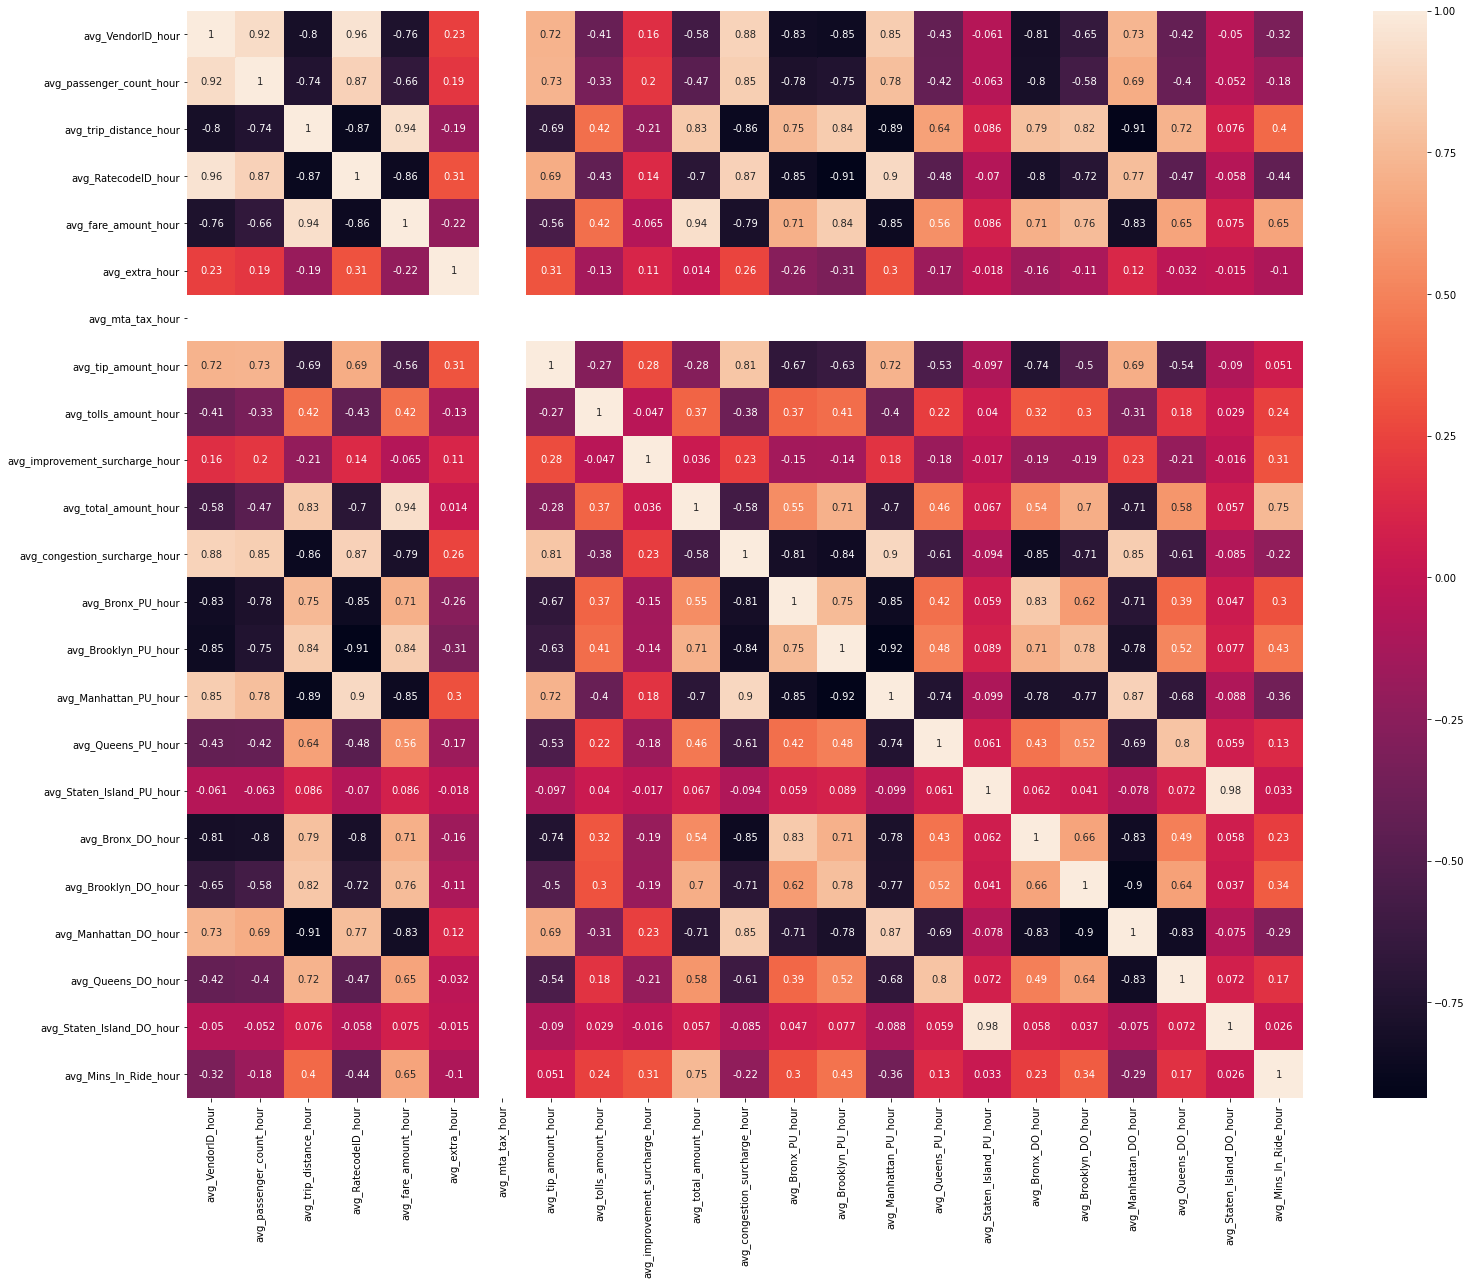

In [16]:
plt.figure(figsize = (25, 20))
sns.heatmap(temp.corr(), annot=True)
plt.yticks(rotation=0)
plt.show()

With this heatmap I can begin to see that trip_distance, fare_amount, tolls_amount, tip_amount, Queens_PU have close to +1 correlations with total_amount.

# 3. Feature Selection And Engineering<a id='3_Feature_Selection_And_Engineering'></a>

In [18]:
df.to_csv('./datasets/Crucial_Elements.csv')